## **Customer Segmentation** involves grouping customers based on shared characteristics, behaviors and preferences. By segmenting customers, businesses can tailor their strategies and target specific groups more effectively and enhance overall market value

In [1]:
# Import Libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Separate the data with delimiter as space into columns and rows

df_cust = pd.read_csv('marketing_campaign.csv',delimiter="\t")
df_cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
# Check shape of dataset
df_cust.shape

(2240, 29)

In [9]:
# Check inforamtion about data
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [10]:
# Get summary of dataset
df_cust.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [11]:
# Check null values count
df_cust.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [12]:
# Drop the null values from the 'income' column
df_cust = df_cust.dropna(subset=['Income'])

# New shape of the dataset
df_cust.shape

(2216, 29)

In [14]:
# Check Count of unique values in columns.
df_cust.nunique()


,0
ID,2216
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,662
Recency,100
MntWines,776


In [15]:
# Check 'Dt_Customer' column
df_cust['Dt_Customer']

,Dt_Customer
0,04-09-2012
1,08-03-2014
2,21-08-2013
3,10-02-2014
4,19-01-2014
...,...
2235,13-06-2013
2236,10-06-2014
2237,25-01-2014
2238,24-01-2014


In [17]:
# Convert 'Dt_Customer' to day, month, year column
df_cust['Dt_Customer'] = pd.to_datetime(df_cust['Dt_Customer'],format="%d-%m-%Y")
df_cust['Day_Customer'] = df_cust['Dt_Customer'].dt.day
df_cust['Month_Customer'] = df_cust['Dt_Customer'].dt.month
df_cust['Year_Customer'] = df_cust['Dt_Customer'].dt.year

In [19]:
# check data with new columns
df_cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Day_Customer,Month_Customer,Year_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,3,11,1,4,9,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,3,11,0,8,3,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,3,11,0,21,8,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,3,11,0,10,2,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,3,11,0,19,1,2014


In [20]:
# check datatype of last 3 columns
df_cust.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,datetime64[ns]
Recency,int64
MntWines,int64


In [21]:
# Check count of unique values in dataset
df_cust.nunique()

,0
ID,2216
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,662
Recency,100
MntWines,776


In [22]:
# Drop 'Z_CostContact', 'Z_Revenue', 'Dt_Customer' values from the dataset.
df_cust = df_cust.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'], axis=1)
df_cust.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Day_Customer,Month_Customer,Year_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,1,4,9,2012
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,0,8,3,2014
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,0,21,8,2013
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,0,10,2,2014
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,0,19,1,2014


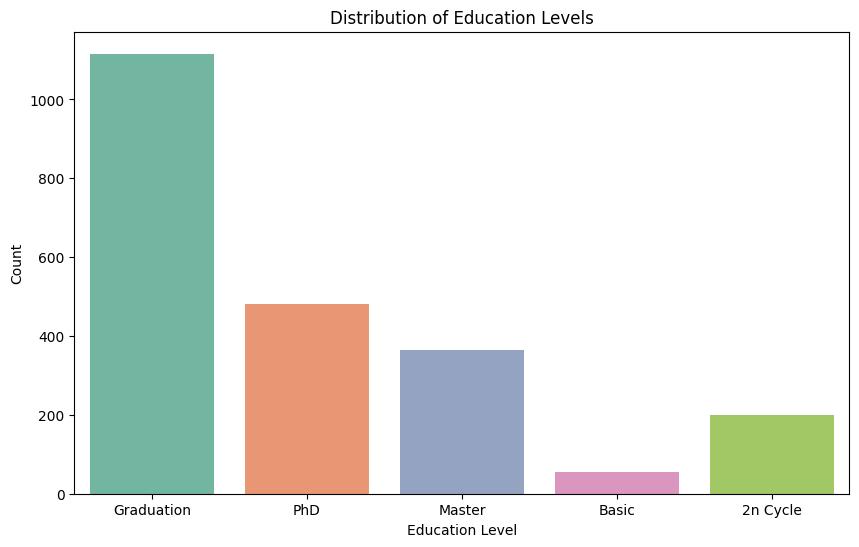

In [24]:
# Plot BarChart of different colors for the 'Education' Column.
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', data=df_cust, palette='Set2')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Levels')
plt.show()

Text(0.5, 1.0, 'Distribution of Marital Status')

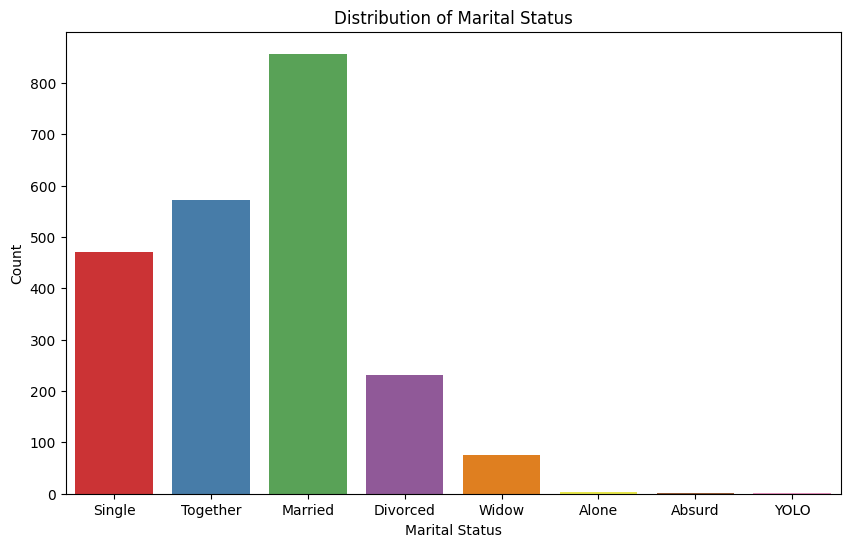

In [28]:
# Plot BarPlot of 'Marital Status' column with different colors with total count over bars.
plt.figure(figsize=(10, 6))
sns.countplot(x='Marital_Status', data=df_cust, palette='Set1')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Marital Status')

In [29]:
# Check the value counts of the 'Marital Status' Column
df_cust['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,573
Single,471
Divorced,232
Widow,76
Alone,3
Absurd,2
YOLO,2


In [30]:
# Convert object type data woth Label Encoding
label_encoder = LabelEncoder()
df_cust['Education'] = label_encoder.fit_transform(df_cust['Education'])
df_cust['Marital_Status'] = label_encoder.fit_transform(df_cust['Marital_Status'])

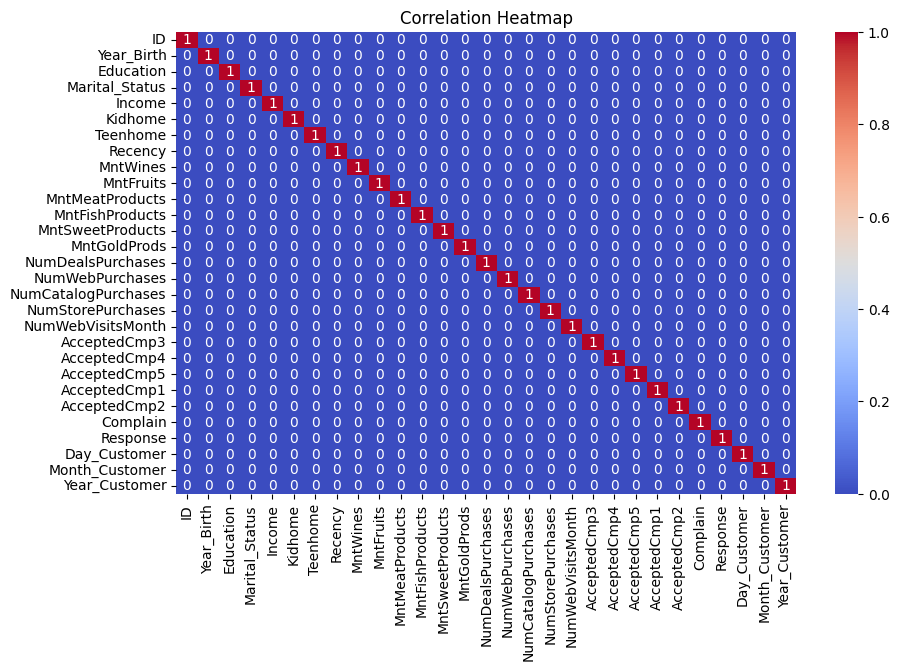

In [31]:
# Plot HeatMap with corr > 0.8
plt.figure(figsize=(10, 6))
sns.heatmap(df_cust.corr() > 0.8, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [32]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cust)

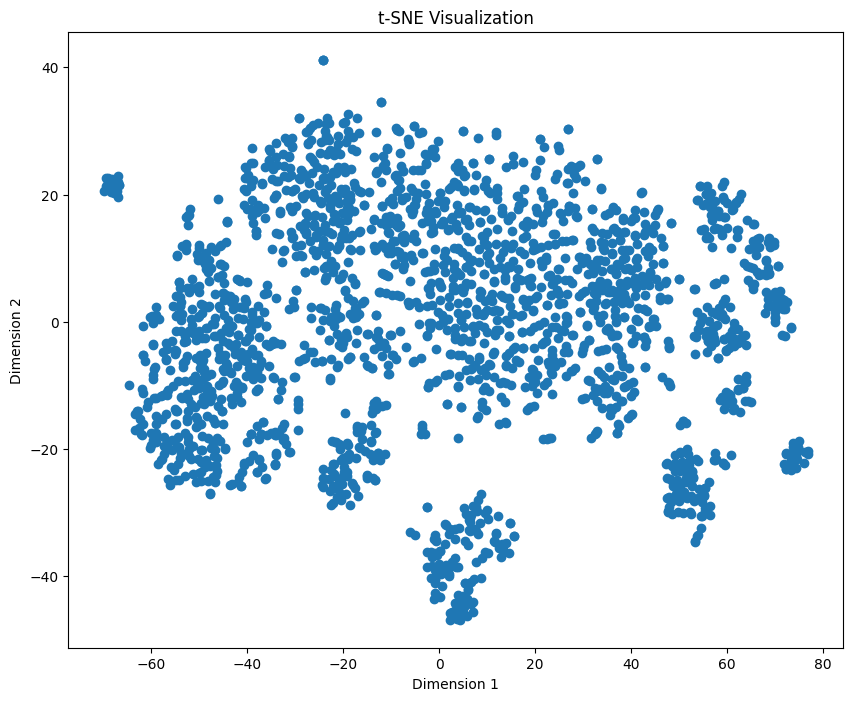

In [33]:
# Use TSNE, fit the data and make a scatter plot.
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot scatter plot
plt.figure(figsize=(10,8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization')
plt.show()

Text(0.5, 0, 'Number of Clusters')

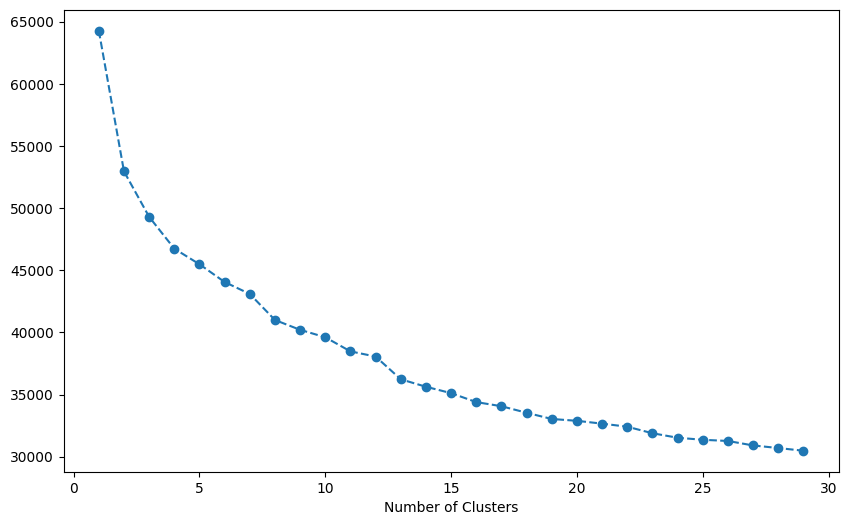

In [41]:
# Check the number of best clusters possible.
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')

In [65]:
# Plot the ScatterPlot with best number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df_cust['Cluster'] = kmeans.fit_predict(X_scaled)

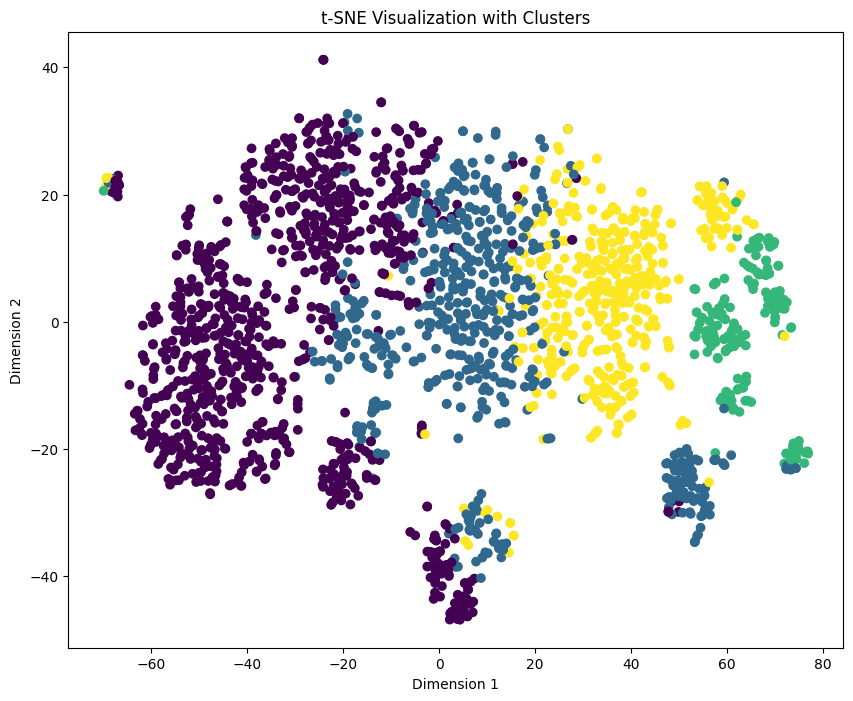

In [66]:
# Plot scatterplot with tsne.
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_cust['Cluster'], cmap='viridis')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE Visualization with Clusters')
plt.show()


In [67]:
 # Evaluate performance of KMeans model.
 from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X_scaled, df_cust['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.1364560762808989


In [69]:
# Import DBSCAN
from sklearn.cluster import DBSCAN

In [77]:
# Build DBSCAN model and fit the data.
dbscan = DBSCAN(eps=1, min_samples=10)
dbscan_clusters  = dbscan.fit_predict(X_scaled)

In [78]:
# Evaluate performance using silhouette score
# Note: Silhouette score requires at least 2 clusters
if len(set(dbscan_clusters)) > 1:
    dbscan_silhouette_avg = silhouette_score(X_scaled, dbscan_clusters)
    print(f'DBSCAN Silhouette Score: {dbscan_silhouette_avg}')
else:
    print("DBSCAN did not form enough clusters to calculate silhouette score.")


DBSCAN did not form enough clusters to calculate silhouette score.
